# Preliminarie study on Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import umap
import seaborn as sns

### Loading Dataset

In [2]:
df = pd.read_csv("../Datasets/wholecells_binary.tsv", sep="\t",index_col = 0) 

array = df.values
col_ind = df.columns
row_ind = df.index

In [3]:
hf_index = []
ps_index = []
np_index = []
sg_index = []
sfg_index = []
all_index = []
state_index = []
for i in range(len(row_ind)):
    s = row_ind[i]
    if s[:2] == "HF":
        hf_index.append(i)
        all_index.append(3)
        state_index.append("HF")
    elif s[:2] == "PS":
        ps_index.append(i)
        all_index.append(1)
        state_index.append("PS")
    elif s[:2] == "NP":
        np_index.append(i)
        all_index.append(2)
        state_index.append("NP")
    elif s[:3] == "4SG":
        sg_index.append(i)
        all_index.append(4)
        state_index.append("4SG")
    else:
        sfg_index.append(i)
        all_index.append(5)
        state_index.append("4SFG")
        
PS = array[ps_index,:]
NP = array[np_index,:]
HF = array[hf_index,:]
SG = array[sg_index,:]
SFG = array[sfg_index,:]

In [4]:
d = {}
for X,s in [(PS,"ps"),(NP,"np"),(HF,"hf"),(SG,"4SG"),(SFG,"4SFG")]:
    tmp = X.sum(axis = 0)
    for i in range(len(col_ind)):
        if not col_ind[i] in d.keys():
            d[col_ind[i]] = {}
        d[col_ind[i]][s] = tmp[i]/len(X[:,])


print("Genes in 4SG group :")        
for k,v in d.items():
    if v["4SG"]/v["4SFG"] > 4:
        print(k)
        
print("Genes in 4SFG group :")        
for k,v in d.items():
    if v["4SG"] == 0 or v["4SFG"]/v["4SG"] > 4:
        print(k)

Genes in 4SG group :
Gata1
Nfe2
Gfi1b
Ikaros
Myb
HbbbH1
Genes in 4SFG group :
Erg
Sox17
HoxD8
Sox7
Etv2
Mecom
Cdh1
Tbx3
Meis1
HoxB4
HoxB2
Notch1
Cdh5
Tbx20


<bound method Figure.show of <Figure size 1152x864 with 48 Axes>>

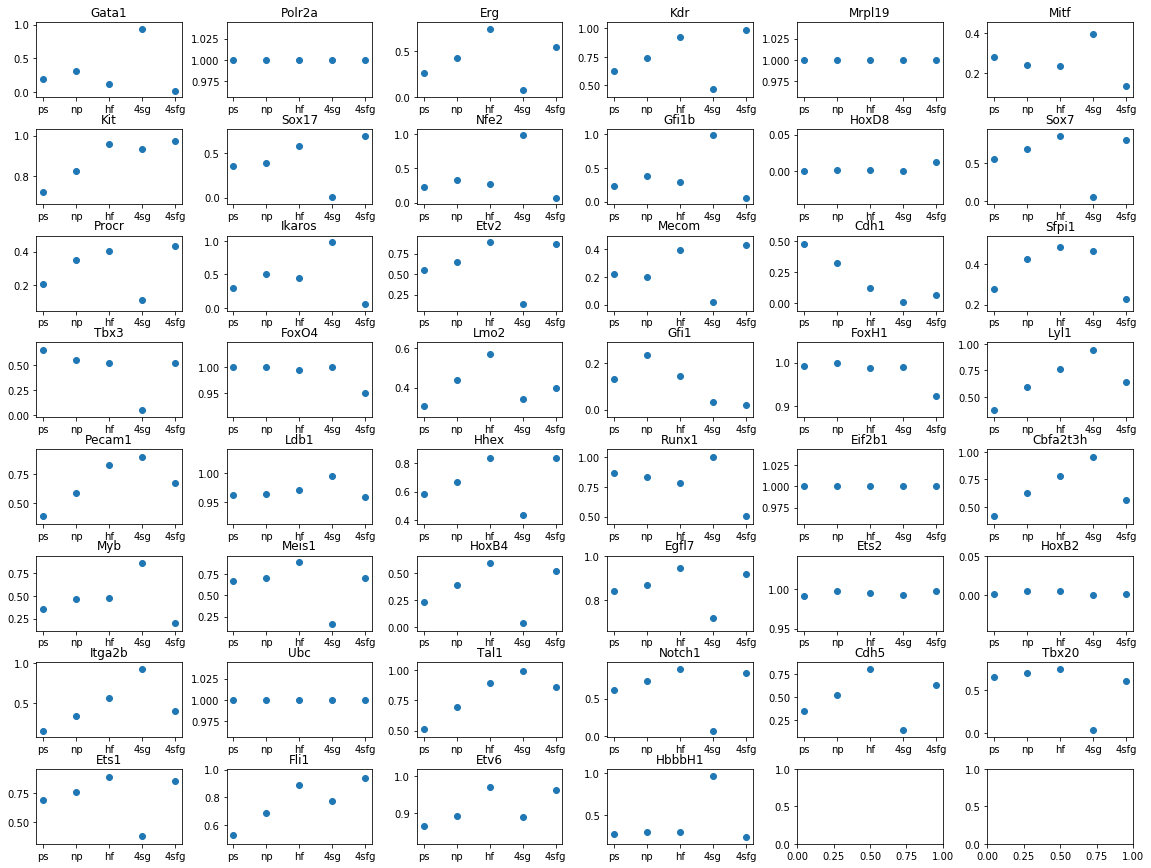

In [22]:
f, axes = plt.subplots(nrows = 8,ncols=6,figsize=(16,12))
f.tight_layout()
i = 0
j = 0
for k,v in d.items():
    axes[i,j].scatter(["ps","np","hf","4sg","4sfg"],[v["ps"],v["np"],v["hf"],v["4SG"],v["4SFG"]])
    axes[i,j].set_title(k)
    j = np.mod(j+1,6)
    if j == 0 :
        i += 1
f.savefig("exp.png")
f.show

## PCA

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df.values)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

targets = pd.DataFrame(data = state_index, columns = ['targets'])

finalDf = pd.concat([principalDf, targets[['targets']]], axis = 1)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

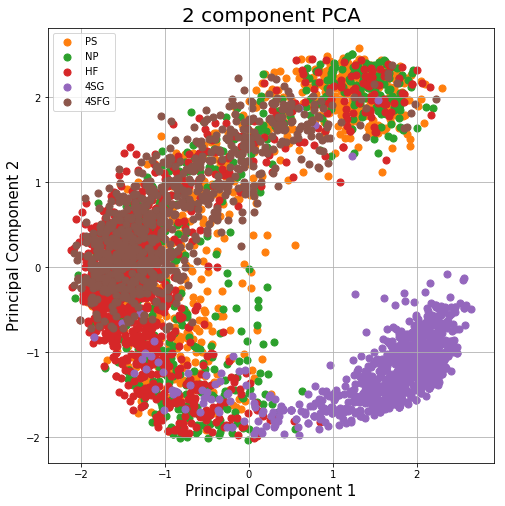

In [26]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['PS', 'NP', 'HF',"4SG","4SFG"]
colors = [sns.color_palette()[1], sns.color_palette()[2], sns.color_palette()[3],sns.color_palette()[4],sns.color_palette()[5]]
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['targets'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
fig.savefig("pca.png")

## UMAP

In [28]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(df.values)
embedding.shape

(3934, 2)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

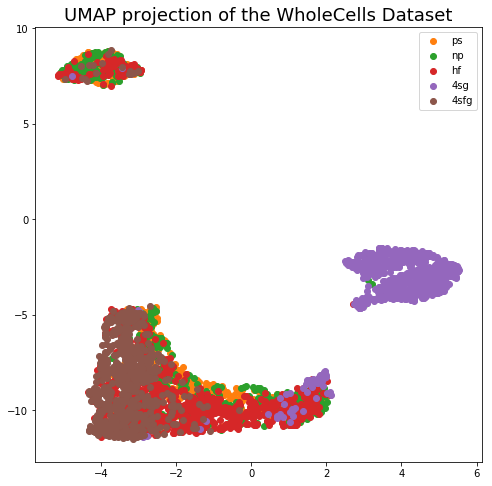

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


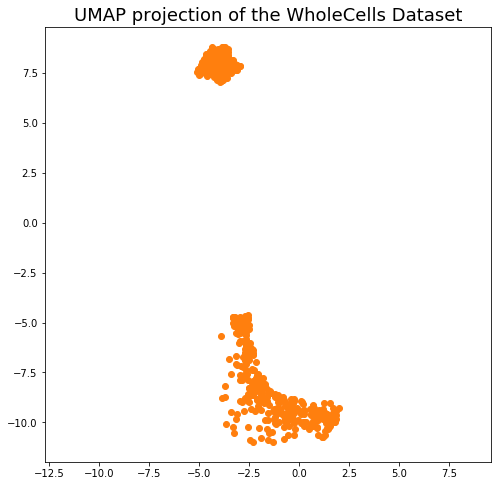

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


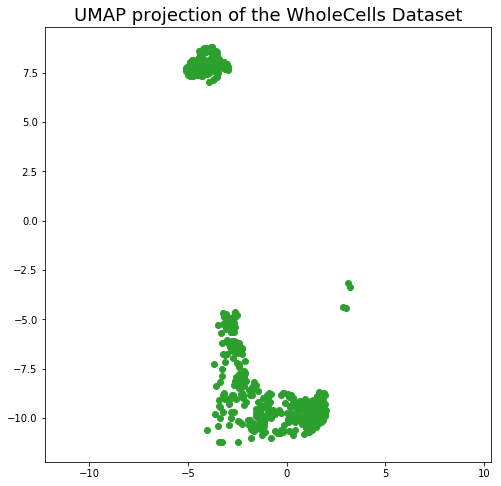

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


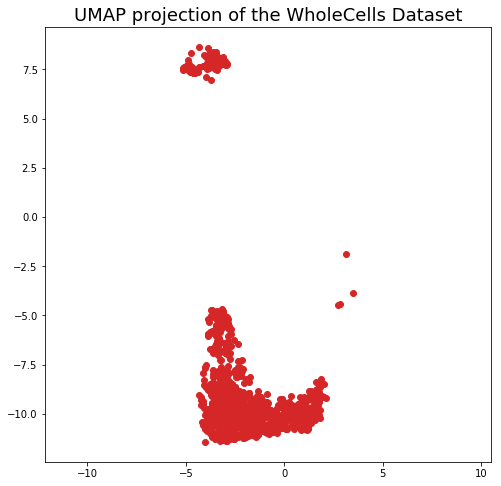

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


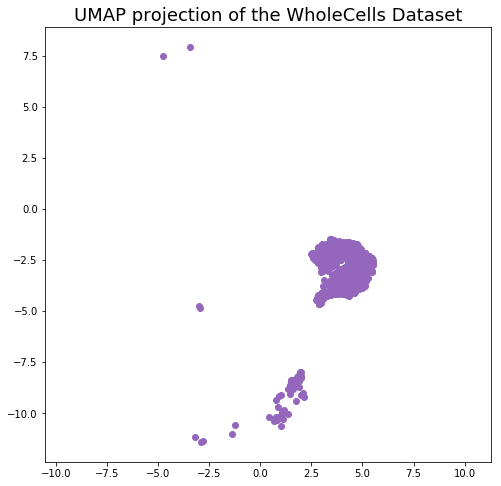

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


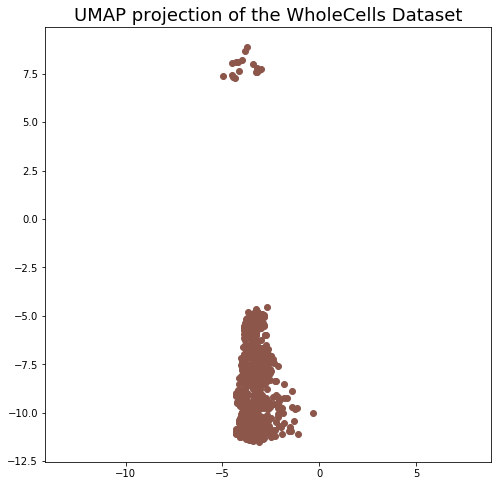

In [29]:
plt.figure(figsize = (8,8))
plt.scatter(embedding[ps_index, 0], embedding[ps_index, 1], c=sns.color_palette()[1] , label  = "ps")
plt.scatter(embedding[np_index, 0], embedding[np_index, 1], c=sns.color_palette()[2] , label  = "np")
plt.scatter(embedding[hf_index, 0], embedding[hf_index, 1], c=sns.color_palette()[3] , label  = "hf")
plt.scatter(embedding[sg_index, 0], embedding[sg_index, 1], c=sns.color_palette()[4] , label  = "4sg")
plt.scatter(embedding[sfg_index, 0], embedding[sfg_index, 1], c=sns.color_palette()[5] , label  = "4sfg")
plt.legend()
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.savefig("umap.png")
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[ps_index, 0], embedding[ps_index, 1], c=sns.color_palette()[1] , label  = "ps")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[np_index, 0], embedding[np_index, 1], c=sns.color_palette()[2] , label  = "np")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[hf_index, 0], embedding[hf_index, 1], c=sns.color_palette()[3] , label  = "hf")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[sg_index, 0], embedding[sg_index, 1], c=sns.color_palette()[4] , label  = "4sg")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()

plt.figure(figsize = (8,8))
plt.scatter(embedding[sfg_index, 0], embedding[sfg_index, 1], c=sns.color_palette()[5] , label  = "4sfg")
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the WholeCells Dataset', fontsize=18);
plt.show()